## Interação e Concorrência 2024/2025

### 3-SAT Problem

##### Gonçalo Gonçalves Barroso A102931
##### Rafaela Antunes Pereira A102527

#### 1 - Realização de uma proposta de uma fórmula booleana 3-SAT

Para este exercício, propomos uma fórmula booleana no formato 3-SAT que é solucionável, ou seja, existe pelo menos uma combinação de valores de verdade que satisfaz todas as cláusulas simultaneamente. A fórmula 
𝐹
F é composta por quatro cláusulas, cada uma contendo exatamente três literais.

$$
F = (x_1 \lor \neg x_2 \lor x_3) \land (\neg x_1 \lor x_2 \lor x_3) \land (x_1 \lor x_2 \lor \neg x_3) \land (\neg x_1 \lor \neg x_2 \lor \neg x_3)
$$


Com o objetivo de verificar a satisfatibilidade da fórmula proposta, procedeu-se à análise de todas as possíveis combinações de valores lógicos atribuídos às variáveis envolvidas. Para facilitar a interpretação dos resultados e a organização da tabela de verdade, optou-se por identificar individualmente cada cláusula da fórmula. Dessa forma, torna-se mais simples observar quais combinações satisfazem todas as cláusulas em simultâneo, garantindo assim a veracidade da fórmula como um todo.

$$
A = x_1 \lor \neg x_2 \lor x_3
$$
$$
B = \neg x_1 \lor x_2 \lor x_3
$$
$$
C = x_1 \lor x_2 \lor \neg x_3
$$
$$
D = \neg x_1 \lor \neg x_2 \lor \neg x_3
$$


| x₁ | ¬x₁ | x₂ | ¬x₂ | x₃ | ¬x₃ | A  | B  | C  | D  | f = A ∧ B ∧ C ∧ D | Resultado                     |
|----|-----|----|-----|----|-----|---------------------|---------------------|----------------------|-----------------------|------------------|------------------------------|
| 0  | 1   | 0  | 1   | 0  | 1   | 1                   | 1                   | 0                    | 1                     | 0                | Não é solução                |
| 0  | 1   | 0  | 1   | 1  | 0   | 1                   | 1                   | 1                    | 0                     | 0                | Não é solução                |
| 0  | 1   | 1  | 0   | 0  | 1   | 1                   | 1                   | 1                    | 1                     | 1                | ✅ **Solução**                |
| 0  | 1   | 1  | 0   | 1  | 0   | 1                   | 1                   | 1                    | 0                     | 0                | Não é solução                |
| 1  | 0   | 0  | 1   | 0  | 1   | 1                   | 0                   | 1                    | 1                     | 0                | Não é solução                |
| 1  | 0   | 0  | 1   | 1  | 0   | 1                   | 1                   | 1                    | 0                     | 0                | Não é solução                |
| 1  | 0   | 1  | 0   | 0  | 1   | 1                   | 0                   | 1                    | 1                     | 0                | Não é solução                |
| 1  | 0   | 1  | 0   | 1  | 0   | 1                   | 1                   | 1                    | 0                     | 0                | Não é solução                |





### 1- Algoritmo de Grover

O algoritmo de Grover é uma versão quantica do algoritmo de busca, que usa o fenômeno de pararelismo quantico para buscar soluçoes para o problema de busca. Este algoritmo apresnta uma melhoria quadrática em relacão ao algoritmo classico.
O algoritmo de Grover divide-se me tres fases, a inicialização, o racle e o diffuser. Temos que ter em consideração o número de qubits a utilizar.
Sabemos que o sudoku é 2 x 2 , ou seja temos 4 celulas na qual cada celula é um qubit.


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from math import pi, sqrt
import matplotlib.pyplot as plt


In [ ]:
# Configuração
num_qubits = 4
num_solucoes = 2
dev = qml.device("default.qubit", wires=5)



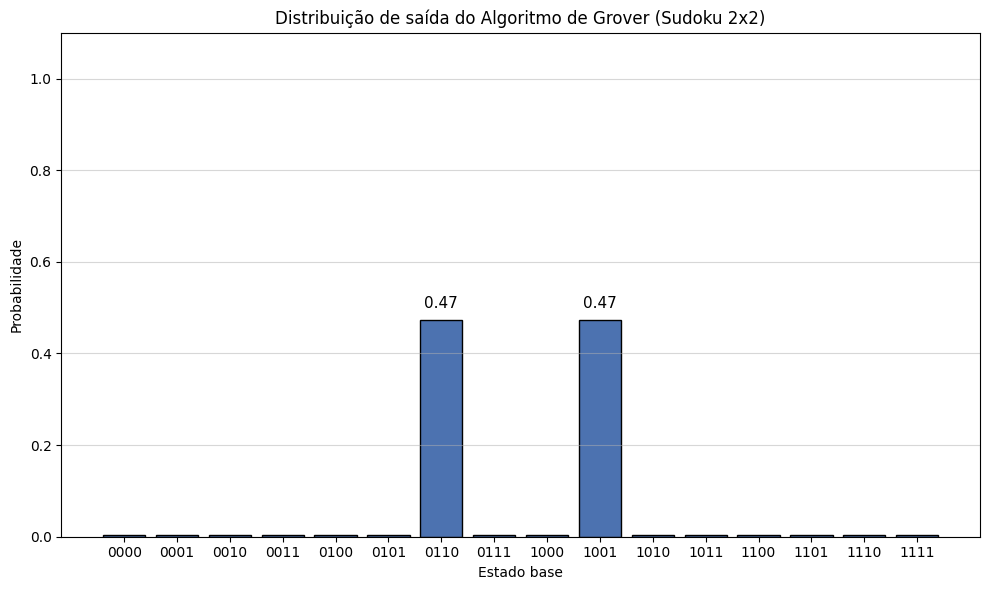

In [ ]:




# ----- Oracle (marca |0110⟩ e |1001⟩) -----
def oracle():
    # Marca |0110>
    qml.PauliX(wires=0)
    qml.PauliX(wires=3)
    qml.MultiControlledX(control_wires=[0, 1, 2, 3], wires=4, control_values='1111')
    qml.PauliX(wires=0)
    qml.PauliX(wires=3)

    # Marca |1001>
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)
    qml.MultiControlledX(control_wires=[0, 1, 2, 3], wires=4, control_values='1111')
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

# ----- Difusor padrão de Grover -----
def diffuser():
    for i in range(4):
        qml.Hadamard(wires=i)
        qml.PauliX(wires=i)

    qml.Hadamard(wires=3)
    qml.MultiControlledX(control_wires=[0, 1, 2], wires=3, control_values='111')
    qml.Hadamard(wires=3)

    for i in range(4):
        qml.PauliX(wires=i)
        qml.Hadamard(wires=i)

# ----- Circuito Grover completo -----
@qml.qnode(dev)
def grover_circuit():
    # Superposição nos qubits de dados
    for i in range(4):
        qml.Hadamard(wires=i)

    # Ancilla em |-> para marcação
    qml.PauliX(wires=4)
    qml.Hadamard(wires=4)

    # Número de iterações
    iteracoes = int((pi / 4) * sqrt(2**num_qubits / num_solucoes))

    for _ in range(iteracoes):
        oracle()
        diffuser()

    # Retorna probabilidades
    return qml.probs(wires=range(4))

# ----- Executar circuito -----
probs = grover_circuit()

# ----- Visualização gráfica -----
states = [np.binary_repr(i, width=4) for i in range(2**num_qubits)]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(states, probs, color="#4C72B0", edgecolor='black')

for bar, prob in zip(bars, probs):
    if prob > 0.01:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{prob:.2f}',
                ha='center', va='bottom', fontsize=11)

ax.set_xlabel("Estado base")
ax.set_ylabel("Probabilidade")
ax.set_title("Distribuição de saída do Algoritmo de Grover (Sudoku 2x2)")
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
